# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 256)       7168      
                                                                 
 activation (Activation)     (None, 98, 98, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 128)       295040    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 128)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 128)       0         
 g2D)                                                   

Found 18000 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


<ipython-input-2-3cff1bce1fb2>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/15
562/562 [==============================] - 5396s 10s/step - loss: 1.7627 - accuracy: 0.2444 - val_loss: 1.6610 - val_accuracy: 0.3114
Epoch 2/15
562/562 [==============================] - 98s 174ms/step - loss: 1.6316 - accuracy: 0.3270 - val_loss: 1.5169 - val_accuracy: 0.3772
Epoch 3/15
562/562 [==============================] - 98s 175ms/step - loss: 1.5582 - accuracy: 0.3691 - val_loss: 1.4695 - val_accuracy: 0.4062
Epoch 4/15
562/562 [==============================] - 98s 175ms/step - loss: 1.5030 - accuracy: 0.3964 - val_loss: 1.4167 - val_accuracy: 0.4344
Epoch 5/15
562/562 [==============================] - 98s 174ms/step - loss: 1.4776 - accuracy: 0.4076 - val_loss: 1.4208 - val_accuracy: 0.4241
Epoch 6/15
562/562 [==============================] - 98s 175ms/step - loss: 1.4529 - accuracy: 0.4216 - val_loss: 1.3893 - val_accuracy: 0.4361
Epoch 7/15
562/562 [==============================] - 94s 167ms/step - loss: 1.4312 - accuracy: 0.4302 - val_loss: 1.4082 - val_ac

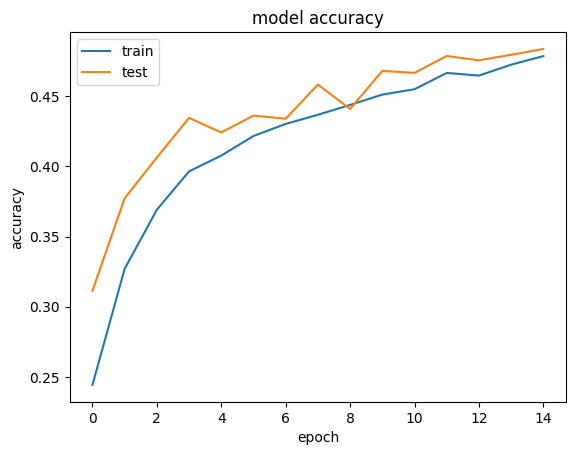

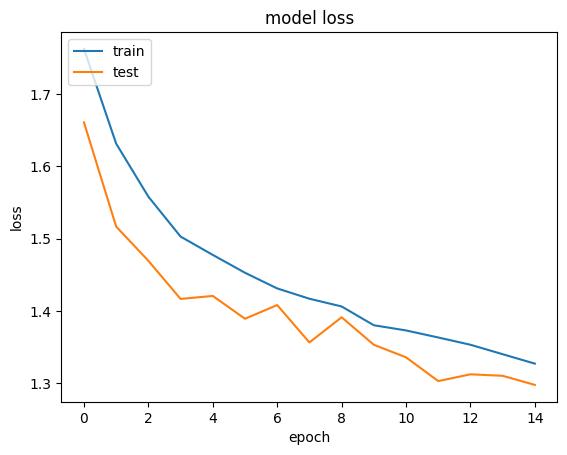

7018.4705674648285


In [ ]:
# importing libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from matplotlib import pyplot as plt
import time
import tensorflow as tf

start = time.time()
img_width, img_height = 100, 100

train_data_dir = '/content/drive/MyDrive/dataset1/train'
validation_data_dir = '/content/drive/MyDrive/dataset1/validation'
nb_train_samples = 18000
nb_validation_samples = 3600
epochs =15
batch_size = 32

input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))
model.summary()

model.compile(loss ='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=1e-5), metrics =['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

Val_datagen = ImageDataGenerator(rescale = 1. / 255)

train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size =(img_width, img_height),
                                                    batch_size = batch_size, class_mode ='categorical')

validation_generator = Val_datagen.flow_from_directory(validation_data_dir,
                                                        target_size =(img_width, img_height),
                                                        batch_size = batch_size, class_mode ='categorical', shuffle=False)

history = model.fit_generator(train_generator,
        steps_per_epoch = nb_train_samples // batch_size,
        epochs = epochs, validation_data = validation_generator,
        validation_steps = nb_validation_samples // batch_size)

model.save_weights('model_saved.h5')

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('loss')
plt.show()
end = time.time()
print(end - start)

Download Models

In [ ]:
from google.colab import files
files.download("model_saved.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['angry','fear','happy','neutral','sad','surprise']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

<ipython-input-4-8d842473a618>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator)


Confusion Matrix
[[290  55  26  82  98  49]
 [123 140  28  79 108 122]
 [ 64  25 375  52  54  30]
 [123  42  50 252  92  41]
 [141  73  37 104 224  21]
 [ 35  46  22  16  18 463]]
Classification Report
              precision    recall  f1-score   support

       angry       0.37      0.48      0.42       600
        fear       0.37      0.23      0.29       600
       happy       0.70      0.62      0.66       600
     neutral       0.43      0.42      0.43       600
         sad       0.38      0.37      0.38       600
    surprise       0.64      0.77      0.70       600

    accuracy                           0.48      3600
   macro avg       0.48      0.48      0.48      3600
weighted avg       0.48      0.48      0.48      3600



Confusion Matrix

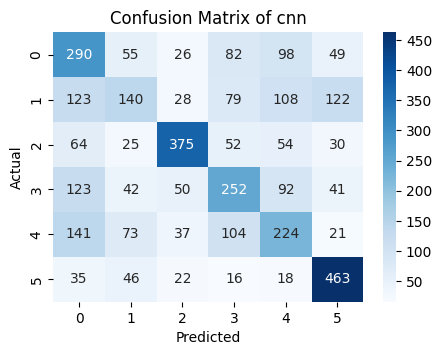

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(validation_generator.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()

#vgg19

Found 18000 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

<ipython-input-3-3f7a02a1443d>:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // batch_size, callbacks=[checkpointer],


Epoch 1/15
1125/1125 [==============================] - ETA: 0s - loss: 1.6377 - acc: 0.3409
Epoch 1: saving model to vgg19detect.hdf5
1125/1125 [==============================] - 3754s 3s/step - loss: 1.6377 - acc: 0.3409 - val_loss: 12.3963 - val_acc: 0.2156


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
1124/1125 [============================>.] - ETA: 0s - loss: 1.4645 - acc: 0.4154
Epoch 2: saving model to vgg19detect.hdf5
1125/1125 [==============================] - 59s 52ms/step - loss: 1.4646 - acc: 0.4153 - val_loss: 10.2842 - val_acc: 0.2008
Epoch 3/15
1124/1125 [============================>.] - ETA: 0s - loss: 1.3825 - acc: 0.4522
Epoch 3: saving model to vgg19detect.hdf5
1125/1125 [==============================] - 58s 52ms/step - loss: 1.3824 - acc: 0.4523 - val_loss: 6.2373 - val_acc: 0.2539
Epoch 4/15
1125/1125 [==============================] - ETA: 0s - loss: 1.3437 - acc: 0.4742
Epoch 4: saving model to vgg19detect.hdf5
1125/1125 [==============================] - 59s 52ms/step - loss: 1.3437 - acc: 0.4742 - val_loss: 2.2743 - val_acc: 0.3722
Epoch 5/15
1124/1125 [============================>.] - ETA: 0s - loss: 1.3258 - acc: 0.4785
Epoch 5: saving model to vgg19detect.hdf5
1125/1125 [==============================] - 61s 54ms/step - loss: 1.3255 - acc: 0.4

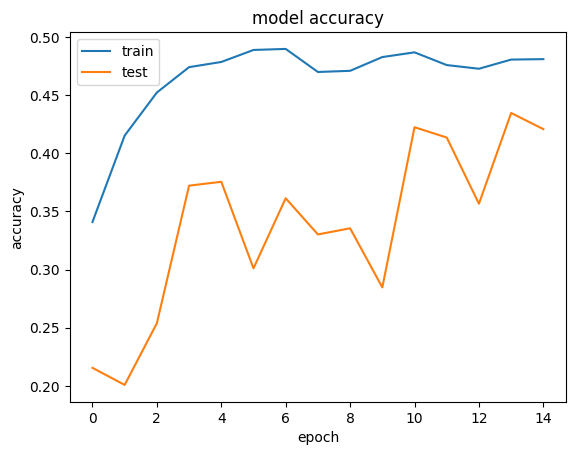

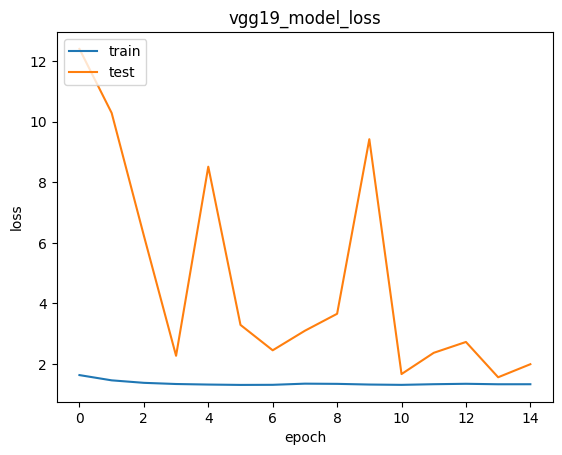

7280.828478097916


In [ ]:
import time
import random
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
import json

batch_size=16
if __name__ == '__main__':
    start = time.time()
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen =ImageDataGenerator(rescale=1./255)

    #dataset loading
    train_gen = train_datagen.flow_from_directory(
            "/content/drive/MyDrive/dataset1/train/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=batch_size,
            classes=['angry','fear','happy','neutral','sad','surprise'],
            class_mode='categorical'
        )

    val_gen = val_datagen.flow_from_directory(
            "/content/drive/MyDrive/dataset1/validation/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=batch_size,
            classes=['angry','fear','happy','neutral','sad','surprise'],
            class_mode='categorical',
            shuffle=False
        )

    # pre-process the data for Keras
    vgg_model = tf.keras.applications.VGG19(weights='imagenet',
                               include_top=False,
                               input_shape=(200, 200, 3))
    layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

    # Getting output tensor of the last VGG layer that we want to include
    x = layer_dict['block2_pool'].output

    # Stacking a new simple convolutional network on top of it
    x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = BatchNormalization()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(6, activation='softmax')(x)

    model = Model(vgg_model.input, x)
    for layer in model.layers[:5]:
        layer.trainable = False

    # from keras import optimizers
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(lr=1e-5),
                  metrics=['acc'])
    model.summary()

    jsonmodel=model.to_json()
    with open('vgg19detect.json','w') as fp:
        json.dump(jsonmodel,fp)

    epochs = 15
    checkpointer = ModelCheckpoint(filepath='vgg19detect.hdf5',
                                   verbose=1)
    history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // batch_size, callbacks=[checkpointer],
                                  verbose=1, validation_data=val_gen, validation_steps=val_gen.n // batch_size)
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('vgg19_accuracy')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('vgg19_model_loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss')
    plt.show()
    end = time.time()
    print(end-start)

Download model

In [ ]:
from google.colab import files
files.download("vgg19detect.json")
files.download("vgg19detect.hdf5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Classification report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_gen.classes, y_pred))
print('Classification Report')
target_names = ['angry','fear','happy','neutral','sad','surprise']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

<ipython-input-5-42bdae209e84>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(val_gen)


Confusion Matrix
[[355 122  14   0  81  28]
 [163 212  17   1 104 103]
 [152  95 291   1  41  20]
 [206 183  22   2 142  45]
 [192 165  11   0 218  14]
 [ 37 106  10   0  10 437]]
Classification Report
              precision    recall  f1-score   support

       angry       0.32      0.59      0.42       600
        fear       0.24      0.35      0.29       600
       happy       0.80      0.48      0.60       600
     neutral       0.50      0.00      0.01       600
         sad       0.37      0.36      0.36       600
    surprise       0.68      0.73      0.70       600

    accuracy                           0.42      3600
   macro avg       0.48      0.42      0.40      3600
weighted avg       0.48      0.42      0.40      3600



Confusion Matrix

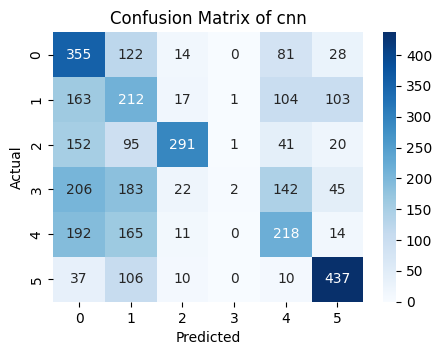

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(val_gen.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of cnn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_cnn.png')

# Show the plot
plt.show()

#Vgg16

In [ ]:
print("starting")
import time
import random
import keras
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, InputLayer
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
import json

if __name__ == '__main__':
    start = time.time()
#    random.seed(8675309)
    train_datagen = ImageDataGenerator(rescale=1./255)
    val_datagen =ImageDataGenerator(rescale=1./255)

#dataset loading
    train_gen = train_datagen.flow_from_directory(
            "/content/drive/MyDrive/dataset1/train/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['angry','fear','happy','neutral','sad','surprise'],
            class_mode='categorical'
        )

    val_gen = val_datagen.flow_from_directory(
            "/content/drive/MyDrive/dataset1/validation/",
            target_size=(200,200),
            color_mode='rgb',
            batch_size=32,
            classes=['angry','fear','happy','neutral','sad','surprise'],
            class_mode='categorical',
            shuffle=False

        )

    # pre-process the data for Keras
    vgg_model = tf.keras.applications.VGG16(weights='imagenet',
                               include_top=False,
                               input_shape=(200, 200, 3))
    layer_dict = dict([(layer.name, layer) for layer in vgg_model.layers])

    # Getting output tensor of the last VGG layer that we want to include
    x = layer_dict['block2_pool'].output

    # Stacking a new simple convolutional network on top of it
    x = Conv2D(filters=256, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(filters=128, kernel_size=(2, 2), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Flatten()(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.2)(x)
    x = Dense(6, activation='softmax')(x)

    model = Model(vgg_model.input, x)
    for layer in model.layers[:5]:
        layer.trainable = False

    # from keras import optimizers
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.RMSprop(lr=1e-3),
                  metrics=['acc'])
    model.summary()

    jsonmodel=model.to_json()
    with open('detect_vgg_16.json','w') as fp:
        json.dump(jsonmodel,fp)

    epochs = 25
    checkpointer = ModelCheckpoint(filepath='model_vgg_16.hdf5',
                                   verbose=1)
    history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],
                                  verbose=1, validation_data=val_gen, validation_steps=val_gen.n // 32)
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('accuracy')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('loss')
    plt.show()
    end = time.time()
    print(end - start)

starting
Found 18000 images belonging to 6 classes.
Found 3600 images belonging to 6 classes.


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

<ipython-input-3-c929622018a0>:83: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_gen, epochs=epochs, steps_per_epoch=train_gen.n // 32 + 1, callbacks=[checkpointer],


Epoch 1/25
563/563 [==============================] - ETA: 0s - loss: 2.4258 - acc: 0.2785 
Epoch 1: saving model to model_vgg_16.hdf5
563/563 [==============================] - 6499s 12s/step - loss: 2.4258 - acc: 0.2785 - val_loss: 1.5019 - val_acc: 0.3800


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/25
563/563 [==============================] - ETA: 0s - loss: 1.5057 - acc: 0.3981

In [ ]:
from google.colab import files
files.download("detect_vgg_16.json")
files.download("model_vgg_16.hdf5")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(val_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_gen.classes, y_pred))
print('Classification Report')
target_names = ['angry','fear','happy','neutral','sad','surprise']
print(classification_report(val_gen.classes, y_pred, target_names=target_names))

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

cm_matrix = confusion_matrix(val_gen.classes, y_pred)
# Read the confusion matrix from Excel into a DataFrame
# Create a heatmap using seaborn
plt.figure(figsize=(5, 3.5))
sns.heatmap(cm_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Confusion Matrix of vgg16')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Save the plot as an image
plt.savefig('confusion_matrix_vgg16.png')

# Show the plot
plt.show()